In [7]:
import pandas as pd
import tqdm as tqdm
import pathlib as path
import tensorflow as tf

Example of selecting left hand landmarks from a parquet file. Store x, y coordinates for each landmark in a dataframe.

In [5]:
exp_df = pd.read_parquet('asl-signs/train_landmark_files/16069/695046.parquet')
temp_dict = {}
for i in range(21):
    temp_df = exp_df.loc[(exp_df['type'] == 'left_hand') & (exp_df['landmark_index'] == i)]
    temp_dict['left_'+str(i)+'_x'] = temp_df['x'].tolist()
    temp_dict['left_'+str(i)+'_y'] = temp_df['y'].tolist()
    # temp_dict['left_'+str(i)+'_z'] = temp_df['z'].tolist()
left_hand_df = pd.DataFrame(temp_dict)
left_hand_df.head()

,left_0_x,left_0_y,left_1_x,left_1_y,left_2_x,left_2_y,left_3_x,left_3_y,left_4_x,left_4_y,...,left_16_x,left_16_y,left_17_x,left_17_y,left_18_x,left_18_y,left_19_x,left_19_y,left_20_x,left_20_y
0,0.782643,0.711918,0.754720,0.619564,0.704010,0.557703,0.651391,0.522717,0.601242,0.499489,...,0.443385,0.499479,0.583490,0.627130,0.503581,0.598522,0.461632,0.582765,0.431971,0.570996
1,0.781900,0.714898,0.754771,0.628583,0.700764,0.568130,0.646427,0.534124,0.597421,0.514050,...,0.447340,0.491922,0.605446,0.633377,0.523593,0.606536,0.473759,0.588775,0.434377,0.575684
2,0.779373,0.706135,0.752581,0.622735,0.701042,0.564153,0.646615,0.531674,0.598764,0.511886,...,0.455372,0.489978,0.611763,0.631005,0.531820,0.609007,0.481178,0.592595,0.442647,0.581228
3,0.769194,0.698776,0.746554,0.618769,0.697400,0.560369,0.644327,0.526537,0.597211,0.505486,...,0.459102,0.491202,0.608818,0.631128,0.531477,0.607993,0.481611,0.590702,0.443215,0.578860
4,0.757270,0.678530,0.741141,0.604423,0.696296,0.552222,0.646613,0.528584,0.602383,0.518516,...,0.452322,0.454042,0.584488,0.599017,0.504150,0.572774,0.457033,0.556963,0.420891,0.544097


Example of selecting right hand landmarks from a parquet file. Store x, y coordinates for each landmark in a dataframe.

In [6]:
exp_df = pd.read_parquet('asl-signs/train_landmark_files/16069/695046.parquet')
temp_dict = {}
for i in range(21):
    temp_df = exp_df.loc[(exp_df['type'] == 'right_hand') & (exp_df['landmark_index'] == i)]
    temp_dict['right_'+str(i)+'_x'] = temp_df['x'].tolist()
    temp_dict['right_'+str(i)+'_y'] = temp_df['y'].tolist()
    # temp_dict['right_'+str(i)+'_z'] = temp_df['z'].tolist()
right_hand_df = pd.DataFrame(temp_dict)
right_hand_df.head()

,right_0_x,right_0_y,right_1_x,right_1_y,right_2_x,right_2_y,right_3_x,right_3_y,right_4_x,right_4_y,...,right_16_x,right_16_y,right_17_x,right_17_y,right_18_x,right_18_y,right_19_x,right_19_y,right_20_x,right_20_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Select right and left hands landmarks to represent a frame. Each hand has 21 landmarks. Each landmark has 3 coordinates. Thus, each frame has 126 features

In [4]:
def generate_data(path, datatype):
    exp_df = pd.read_parquet(path)
    temp_dict = {}
    for i in range(21):
        temp_df = exp_df.loc[(exp_df['type'] == datatype) & (exp_df['landmark_index'] == i)]
        temp_dict[datatype+str(i)+'_x'] = temp_df['x'].tolist()
        temp_dict[datatype+str(i)+'_y'] = temp_df['y'].tolist()
        # temp_dict[datatype+str(i)+'_z'] = temp_df['z'].tolist()
    generated_df = pd.DataFrame(temp_dict)
    return(generated_df)
    

Generate selected dataset, may takes more than an hour

In [ ]:
train_df = pd.read_csv('asl-signs/train.csv')
train_dict = {}
train_list = []
for index, row in train_df.iterrows():
    sign = row['sign']
    left_hand_df = generate_data('asl-signs/'+row['path'], 'right_hand')
    right_hand_df = generate_data('asl-signs/'+row['path'], 'left_hand')
    train_df = pd.concat([left_hand_df, right_hand_df], axis=1)
    train_tensor = tf.convert_to_tensor(train_df)
    train_list.append(train_tensor)

In [44]:
# Total number of data
print(len(train_list))

94477


In [7]:
train_df_temp = pd.read_csv('asl-signs/train.csv')
sign_list = []
for index, row in train_df_temp.iterrows():
    sign = row['sign']
    sign_list.append(sign)

In [ ]:
from collections import defaultdict
frame_number_record = defaultdict(list)
for i in range(len(train_list)):
    frame_number_record[sign_list[i]].append(train_list[i].shape[0])

Average number of frames for each sign

250


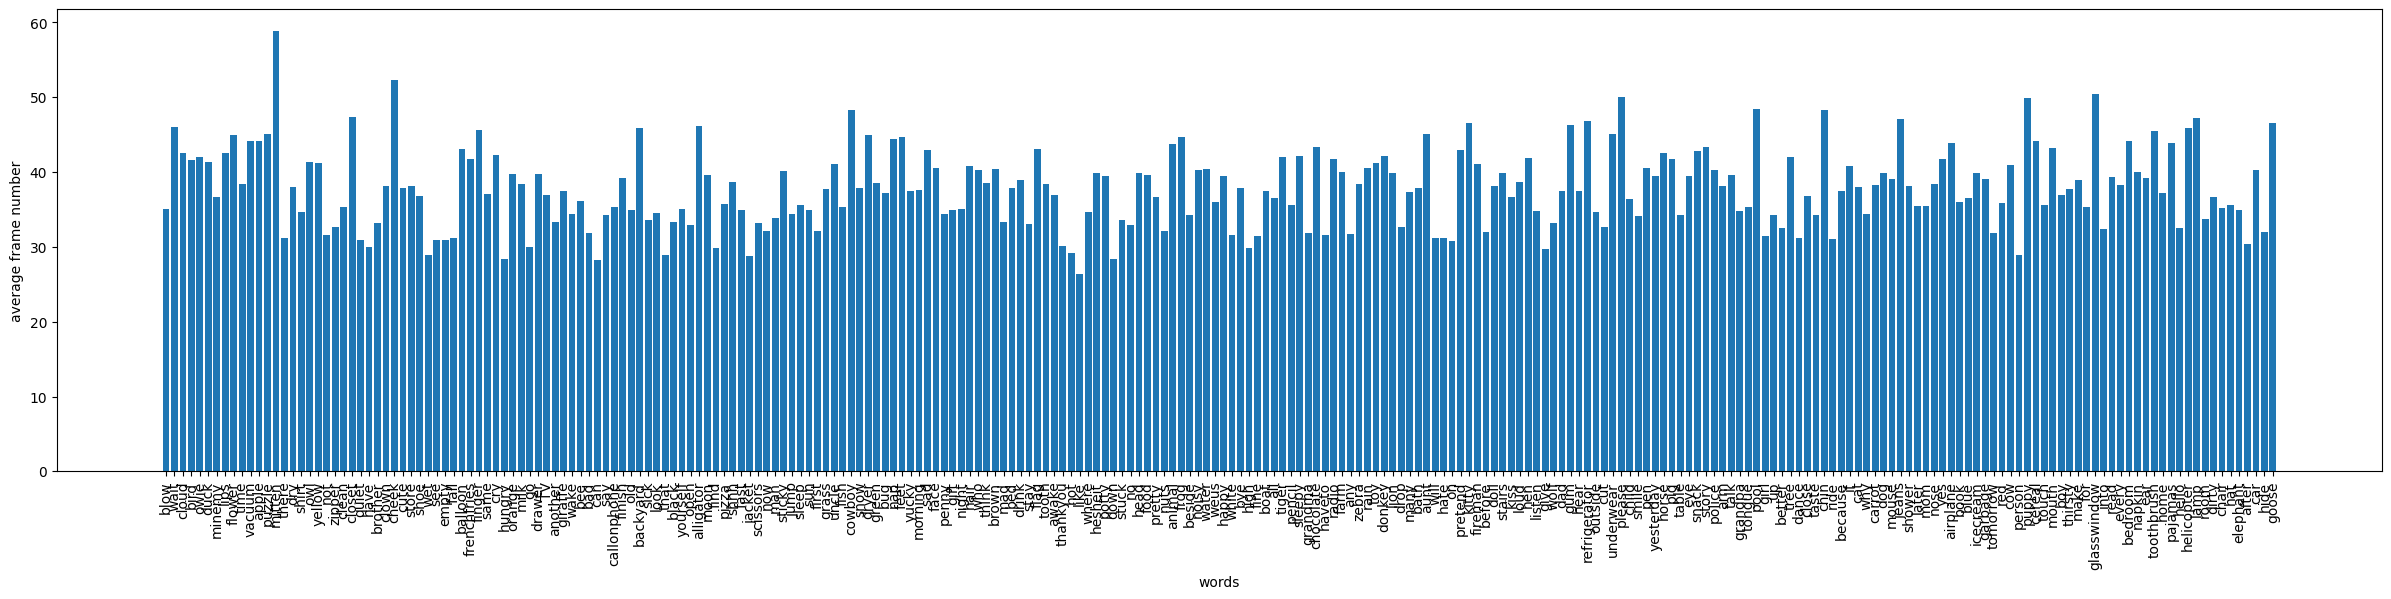

In [31]:
import statistics
import matplotlib.pyplot as plt
print(len(frame_number_record.keys()))
sign_average_frame_number = {}
for key, value in frame_number_record.items():
    sign_average_frame_number[key] = statistics.mean(value)


plt.figure(figsize=(30,6))
plt.bar(range(len(sign_average_frame_number)), list(sign_average_frame_number.values()), tick_label=list(sign_average_frame_number.keys()))
plt.xticks(rotation=90)
plt.xlabel("words")
plt.ylabel("average frame number")
plt.show()

Number of frames of the videos for sign "blow"

Text(0, 0.5, 'number of frames')

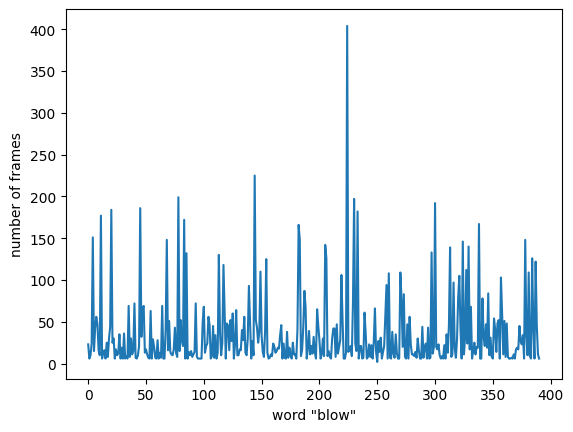

In [35]:
y = frame_number_record['blow']
x = range(len(frame_number_record['blow']))
plt.plot(x, y)
plt.xlabel('word \"blow\"')
plt.ylabel('number of frames')

Select videos that have less than 100 frames

In [36]:
import json
 
# Opening JSON file
with open('asl-signs/sign_to_prediction_index_map.json') as json_file:
    word_map = json.load(json_file)

In [37]:
filtered_data = []
filtered_target = []
for i in range(len(train_list)):
    if train_list[i].shape[0]<100:
        train_list[i] = tf.where(tf.math.is_nan(train_list[i]), 0., train_list[i])
        filtered_data.append(train_list[i])
        filtered_target.append(word_map[sign_list[i]])

In [45]:
print(len(filtered_data))

85965


In [38]:
filtered_data_padded = [tf.pad(item, tf.constant([[0, 100-item.shape[0]], [0, 0]])) for item in filtered_data]

In [39]:
train_ds = tf.data.Dataset.from_tensor_slices(filtered_data_padded)

In [40]:
target_ds = tf.data.Dataset.from_tensor_slices(filtered_target)

In [41]:
train_dataset = tf.data.Dataset.zip((train_ds, target_ds))

In [46]:
train_dataset

<ZipDataset element_spec=(TensorSpec(shape=(100, 120), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [47]:
import tempfile
train_dataset.save('asl_train_data')